In [1]:
#imports
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#carregando o arquivo
df = pd.read_excel("dataset/default of credit card clients.xls", header=1)

In [3]:
#renomear coluna target para nome mais amigável
df.rename(columns={"default payment next month": "target"}, inplace=True)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
#separar features de target
X = df.drop(columns=["ID", "target"])
Y = df["target"]

In [6]:
#dividir oem conjunto de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [7]:
#padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [8]:
# Lista de valores de n_neighbors
n_neighbors_list = [3, 5, 10, 15, 20, 30, 50, 60, 75]

In [9]:
# Dicionário para armazenar as acurácias
accuracy_results = {}

In [10]:
# Treinar modelos e calcular acurácia
for n in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, Y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, y_pred)
    accuracy_results[n] = accuracy

In [11]:
# Exibir os resultados
for n, acc in accuracy_results.items():
    print(f"n_neighbors = {n}: Acurácia = {acc:.4f}")

n_neighbors = 3: Acurácia = 0.7750
n_neighbors = 5: Acurácia = 0.7928
n_neighbors = 10: Acurácia = 0.8085
n_neighbors = 15: Acurácia = 0.8063
n_neighbors = 20: Acurácia = 0.8085
n_neighbors = 30: Acurácia = 0.8070
n_neighbors = 50: Acurácia = 0.8092
n_neighbors = 60: Acurácia = 0.8103
n_neighbors = 75: Acurácia = 0.8060


In [12]:
# Listas de hiperparâmetros para Random Forest
max_depths_list = [5, 10, None]
max_features_list = [0.05, 0.1, 'sqrt']

In [13]:
# Dicionário para armazenar as acurácias do Random Forest
accuracy_results_rf = {}

In [14]:
# Treinar modelos Random Forest e calcular acurácia
for max_depth in max_depths_list:
    for max_features in max_features_list:
        rf = RandomForestClassifier(max_depth=max_depth, max_features=max_features, random_state=42)
        rf.fit(X_train, Y_train)
        y_pred = rf.predict(X_test)
        accuracy = accuracy_score(Y_test, y_pred)
        accuracy_results_rf[(max_depth, max_features)] = accuracy

In [15]:
# Exibir os resultados do Random Forest
for params, acc in accuracy_results_rf.items():
    print(f"Random Forest - max_depth = {params[0]}, max_features = {params[1]}: Acurácia = {acc:.4f}")

Random Forest - max_depth = 5, max_features = 0.05: Acurácia = 0.7990
Random Forest - max_depth = 5, max_features = 0.1: Acurácia = 0.8027
Random Forest - max_depth = 5, max_features = sqrt: Acurácia = 0.8122
Random Forest - max_depth = 10, max_features = 0.05: Acurácia = 0.8077
Random Forest - max_depth = 10, max_features = 0.1: Acurácia = 0.8098
Random Forest - max_depth = 10, max_features = sqrt: Acurácia = 0.8170
Random Forest - max_depth = None, max_features = 0.05: Acurácia = 0.8078
Random Forest - max_depth = None, max_features = 0.1: Acurácia = 0.8142
Random Forest - max_depth = None, max_features = sqrt: Acurácia = 0.8120


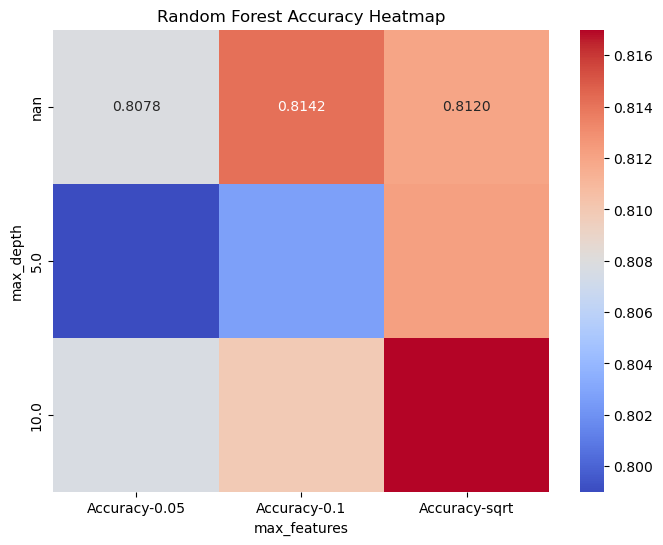

In [16]:
# Criar heatmap para os resultados do Random Forest
heatmap_data = pd.DataFrame(accuracy_results_rf.values(), 
                            index=pd.MultiIndex.from_tuples(accuracy_results_rf.keys(), names=["max_depth", "max_features"]), 
                            columns=["Accuracy"]).unstack(level=1)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Random Forest Accuracy Heatmap")
plt.xlabel("max_features")
plt.ylabel("max_depth")
plt.show()